# Commities solution for NNs

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
import tensorflow as tf
#physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
import os 
import tensorflow as tf
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # Mke model run on CPU, the GPU version is unstable 
print(tf.__version__)
import os
import re
import shutil
import tensorflow as tf

2.0.0-alpha0


## Load and Review processed data


In [4]:
import pickle

In [5]:
training_set_features = pickle.load(open( "Dataset/processed/training_features.pickle", "rb" ) )

training_set_labels = pickle.load(open( "Dataset/processed/training_labels.pickle", "rb" ) )

In [6]:
testing_set_features = pickle.load(open( "Dataset/processed/test_features.pickle", "rb" ) )

testing_set_labels = pickle.load(open( "Dataset/processed/test_labels.pickle", "rb" ) )

In [7]:
training_set_features

array([[0.28235295, 0.30588236, 0.31764707, ..., 0.4117647 , 0.42352942,
        0.32156864],
       [0.59607846, 0.58431375, 0.5764706 , ..., 0.75686276, 0.70980394,
        0.7176471 ],
       [0.11372549, 0.09803922, 0.08235294, ..., 0.68235296, 0.6784314 ,
        0.68235296],
       ...,
       [0.17254902, 0.17254902, 0.1764706 , ..., 0.67058825, 0.75686276,
        0.78039217],
       [0.42745098, 0.09019608, 0.08235294, ..., 0.08235294, 0.09411765,
        0.20784314],
       [0.36078432, 0.3372549 , 0.34117648, ..., 0.4       , 0.41960785,
        0.38039216]], dtype=float32)

In [8]:
len(training_set_labels)

20198

In [9]:
testing_set_features

[array([0.22745098, 0.25882353, 0.2745098 , ..., 0.01960784, 0.02745098,
        0.03529412]),
 array([0.09019608, 0.10196078, 0.08235294, ..., 0.98823529, 0.98823529,
        0.99215686]),
 array([0.78823529, 0.71372549, 0.71372549, ..., 0.74509804, 0.78039216,
        0.81176471]),
 array([0.36470588, 0.3372549 , 0.30588235, ..., 0.07058824, 0.07058824,
        0.0627451 ]),
 array([0.04313725, 0.02352941, 0.00392157, ..., 0.00392157, 0.        ,
        0.        ]),
 array([0.36470588, 0.36470588, 0.35686275, ..., 0.87058824, 0.89411765,
        0.9254902 ]),
 array([0.01960784, 0.04313725, 0.03529412, ..., 0.60392157, 0.63921569,
        0.64313725]),
 array([0.16078431, 0.01568627, 0.00392157, ..., 0.10980392, 0.09411765,
        0.08627451]),
 array([0.63137255, 0.58823529, 0.61176471, ..., 0.84313725, 0.86666667,
        0.8745098 ]),
 array([0.2627451 , 0.29411765, 0.31764706, ..., 0.34509804, 0.37647059,
        0.58039216]),
 array([0.96862745, 0.85490196, 0.98823529, ..., 0

In [10]:
len(testing_set_labels)

4942

# Visualizing images 

In [11]:
integer_to_emotion = { 0 : 'Angry', 1 : 'Happy', 2:'Fear', 3:'Sad'}

In [12]:
from matplotlib import pyplot as plt

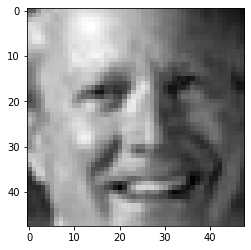

In [13]:
plt.imshow(testing_set_features[1821].reshape(48,48), cmap = 'gray')

In [14]:
integer_to_emotion[testing_set_labels[1821]]

'Happy'

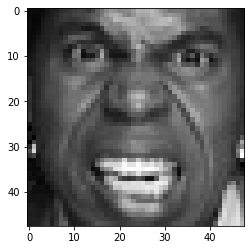

In [15]:
plt.imshow(testing_set_features[19].reshape(48,48), cmap = 'gray')

In [16]:
integer_to_emotion[testing_set_labels[19]]

'Angry'



# Commities of Neural Networks in tf.Keras

### Using the Neural Networks that were previosuly trained, along with equal weights for each prediction and a simply majority vote classification. 

### This way we can measure and compare the accuracy to the simpler models.


### The NNs do not have to be re-trained and they can easily just be queried during test time

### The models are loaded, after they have been trained and saved in the previous Notebook (Notebook 6 Solution).

### A final model is trained and used as part of the Ensemble 

In [17]:
# LOAD Batch-Norm Model 
BATCH_MODEL = tf.keras.models.load_model('trained models/my_batch_model')

# Check its architecture
BATCH_MODEL.summary()

Model: "Batch Norm Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 200)               461000    
_________________________________________________________________
batch_normalization_v2_2 (Ba (None, 200)               800       
_________________________________________________________________
dense_layer_2 (Dense)        (None, 200)               40200     
_________________________________________________________________
batch_normalization_v2_3 (Ba (None, 200)               800       
_________________________________________________________________
output_layer (Dense)         (None, 4)                 804       
Total params: 503,604
Trainable params: 502,804
Non-trainable params: 800
_________________________________________________________________


In [18]:
# LOAD lasso 
LASSO_MODEL = tf.keras.models.load_model('trained models/my_lasso_model')

# Check its architecture
LASSO_MODEL.summary()

Model: "LASSO MODEL"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 200)               461000    
_________________________________________________________________
dense_layer_2 (Dense)        (None, 200)               40200     
_________________________________________________________________
output_layer (Dense)         (None, 4)                 804       
Total params: 502,004
Trainable params: 502,004
Non-trainable params: 0
_________________________________________________________________


In [19]:
# FINAL DEEP NN MODEL 
initializer = tf.keras.initializers.GlorotNormal(seed=1) # Weight initialization

deep_model = tf.keras.models.Sequential( name = 'DEEP NN' )

deep_model.add(keras.layers.Dense (200,input_shape = (2304,), name='dense_layer_1', 
                                         kernel_initializer = initializer,
                                         activation='relu'))

#deep_model.add(keras.layers.BatchNormalization()) #batch norm layer 
deep_model.add(keras.layers.Dense (200, name='dense_layer_2', 
                                         kernel_initializer = initializer,
                                         activation='relu'))

#batch_norm_model.add(keras.layers.BatchNormalization()) # batch norm layer
deep_model.add(keras.layers.Dense (200, name='dense_layer_3', 
                                         kernel_initializer = initializer,
                                         activation='relu'))

deep_model.add(keras.layers.Dense (200, name='dense_layer_4', 
                                         kernel_initializer = initializer,
                                         activation='relu'))

deep_model.add(keras.layers.Dense( 4, name='output_layer', kernel_initializer = initializer, 
                                  activation = 'softmax'  ) )

In [20]:
deep_model.summary()

Model: "DEEP NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 200)               461000    
_________________________________________________________________
dense_layer_2 (Dense)        (None, 200)               40200     
_________________________________________________________________
dense_layer_3 (Dense)        (None, 200)               40200     
_________________________________________________________________
dense_layer_4 (Dense)        (None, 200)               40200     
_________________________________________________________________
output_layer (Dense)         (None, 4)                 804       
Total params: 582,404
Trainable params: 582,404
Non-trainable params: 0
_________________________________________________________________


In [21]:
deep_model.compile(optimizer = 'ADAM', 
              loss = 'sparse_categorical_crossentropy',  # If LABELS---> Integers, then sparse is used. IF one-hot, then CE is used
              metrics=['accuracy'])

In [22]:
# Train the Deep NN 

In [23]:
tf_test_dataset = tf.data.Dataset.from_tensor_slices((testing_set_features,testing_set_labels)) # pass in data as tuple
tf_test_dataset

<TensorSliceDataset shapes: ((2304,), ()), types: (tf.float64, tf.float64)>

In [24]:
tf_training_dataset = tf.data.Dataset.from_tensor_slices((training_set_features,training_set_labels)) # pass in data as tuple
tf_training_dataset

#shuffle data
shuffled_set = tf_training_dataset.shuffle(50_000)#.batch(64)    
shuffled_set

<ShuffleDataset shapes: ((2304,), ()), types: (tf.float32, tf.int8)>

In [25]:
# setting seeeds 
np.random.seed(1)
tf.random.set_seed(1)
deep_model.fit(shuffled_set.batch(64), shuffle = False, epochs = 100, verbose = 1)

Epoch 1/100
316/316 [==============================] - 2s 7ms/step - loss: 1.3401 - accuracy: 0.3649
Epoch 2/100
316/316 [==============================] - 1s 4ms/step - loss: 1.2935 - accuracy: 0.4108
Epoch 3/100
316/316 [==============================] - 1s 4ms/step - loss: 1.2772 - accuracy: 0.4197
Epoch 4/100
316/316 [==============================] - 1s 4ms/step - loss: 1.2553 - accuracy: 0.4376
Epoch 5/100
316/316 [==============================] - 1s 4ms/step - loss: 1.2454 - accuracy: 0.4394
Epoch 6/100
316/316 [==============================] - 1s 4ms/step - loss: 1.2338 - accuracy: 0.4477
Epoch 7/100
316/316 [==============================] - 1s 4ms/step - loss: 1.2247 - accuracy: 0.4543
Epoch 8/100
316/316 [==============================] - 1s 5ms/step - loss: 1.2205 - accuracy: 0.4583
Epoch 9/100
316/316 [==============================] - 2s 5ms/step - loss: 1.2176 - accuracy: 0.4573
Epoch 10/100
316/316 [==============================] - 1s 4ms/step - loss: 1.2119 - accura

In [26]:
#evalute the model
test_loss, test_acc = deep_model.evaluate(tf_test_dataset.batch(64))
print('Test accuracy:', test_acc)

78/78 [==============================] - 0s 5ms/step - loss: 1.3001 - accuracy: 0.4450
Test accuracy: 0.44496155


In [27]:
#evalute the lasso model...
test_loss, test_acc = LASSO_MODEL.evaluate(tf_test_dataset.batch(64))
print('Test accuracy:', test_acc)

78/78 [==============================] - 0s 6ms/step - loss: 1.2766 - accuracy: 0.4686
Test accuracy: 0.46863618


In [28]:
#evalute the btach_norm model...
test_loss, test_acc = BATCH_MODEL.evaluate(tf_test_dataset.batch(64))
print('Test accuracy:', test_acc)

78/78 [==============================] - 0s 6ms/step - loss: 8.0754 - accuracy: 0.3153
Test accuracy: 0.31525698


# Ensemble of NN models

In [29]:
models = [BATCH_MODEL, LASSO_MODEL, deep_model]

In [30]:
# aLL models in the Ensemble 
for model in models:
    print(model.name)

Batch Norm Model
LASSO MODEL
DEEP NN


In [31]:
# Inference of the Ensemble of models on the Entire TEST SET 

predictions = np.array([],dtype = 'int64')

for test_sample in testing_set_features[:]:
    
    intermidiate_predictions =  np.array([],dtype = 'int64')
    
    for model in models:
        
            probs = model.predict(test_sample.reshape(2304,-1).T)
            
            predicted_class = probs.argmax() #predicted class of a single NN 
            
            intermidiate_predictions = np.append(intermidiate_predictions,predicted_class)
            
            #print(len(intermidiate_predictions))
            
            
    # find the ensemble prediction  
    ensemble_probs = np.bincount(intermidiate_predictions)
    
    ensemble_prediction = np.argmax(ensemble_probs)
    
    #print(ensemble_prediction)
    
    predictions = np.append(predictions,ensemble_prediction)
            
    

In [32]:
len(predictions)

4942

In [33]:
predictions[:150]

array([3, 2, 1, 3, 2, 0, 1, 0, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3,
       1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 3, 0, 1, 0, 1, 0, 0, 1, 3, 1, 1, 3,
       3, 1, 1, 2, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1,
       3, 0, 0, 1, 3, 3, 0, 0, 2, 1, 0, 1, 3, 2, 1, 3, 2, 3, 1, 3, 0, 2,
       1, 1, 1, 1, 3, 2, 2, 0, 3, 1, 1, 1, 3, 3, 0, 2, 1, 0, 1, 3, 0, 3,
       3, 1, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 0, 1, 0, 2, 1, 3,
       1, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 2, 2, 3, 3, 1, 2, 2], dtype=int64)

In [34]:
predictions

array([3, 2, 1, ..., 3, 3, 1], dtype=int64)

## Ensemble Metrics and Confusion Matrix

In [35]:
labels = ['Angry','Happy','Fear','Sad']

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(testing_set_labels, predictions, target_names = ['Angry','Happy','Fear','Sad']))

              precision    recall  f1-score   support

       Angry       0.33      0.23      0.27       960
       Happy       0.55      0.77      0.64      1825
        Fear       0.40      0.24      0.30      1018
         Sad       0.38      0.37      0.37      1139

    accuracy                           0.47      4942
   macro avg       0.42      0.40      0.40      4942
weighted avg       0.44      0.47      0.44      4942



In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(testing_set_labels, predictions)

In [40]:
cm

array([[ 223,  363,  136,  238],
       [ 140, 1414,   77,  194],
       [ 148,  373,  243,  254],
       [ 159,  416,  145,  419]], dtype=int64)

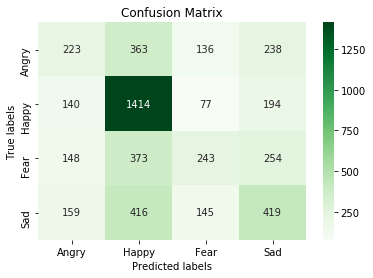

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g', cmap='Greens'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

## END OF NOTEBOOK 